In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## Read simulations output

Read the `ranks.tsv` file.

### Melt the rows with multiple `PATHOMECHANISM` entries
Some lines represent cases where variants with multiple pathomechanisms were present. 

E.g.: `PMID:24704046-Mattioli-2014-FANCA-proband_II-1	1	1	splicing|3ss|disrupted;splicing|SRE`

We split such line into two lines where value from `PATHOMECHANISM` column is distributed into two rows. Other values stay the same.

### Remove lines representing non-splicing pathomechanisms

Lines with pathomechanism such as `coding|missense` are removed.

In [4]:
FPATH = "/home/ielis/data/threes-simulations/output-checked/ranks.tsv"
df = pd.read_csv(FPATH, sep="\t")

# melt rows with multiple PATHOMECHANISM entries
df['PATHOMECHANISM'] = df['PATHOMECHANISM'].str.split(";")
df = df.explode("PATHOMECHANISM")

# remove lines with non-splicing pathomechanism
df = df.loc[df.PATHOMECHANISM.str.startswith("splicing"), :]

df.head()

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM
0,PMID:11828341-Ishii-2002-GLA-proband_1,-1,-1,splicing|SRE|ESS|binding|decreased
1,PMID:28679633-Ito-2017-MYBPC3-VARIANT407-5C>T,90,10,splicing|3ss|disrupted
2,PMID:23606313-Fan-2013-TAZ-proband,1,1,splicing|5css|activated
3,PMID:8878424-Jin-1996-ITGB3-RS,1,1,splicing|5ss|disrupted
4,PMID:10330348-Teraoka-1999-ATM-AT51LA,1,1,splicing|5ss|disrupted


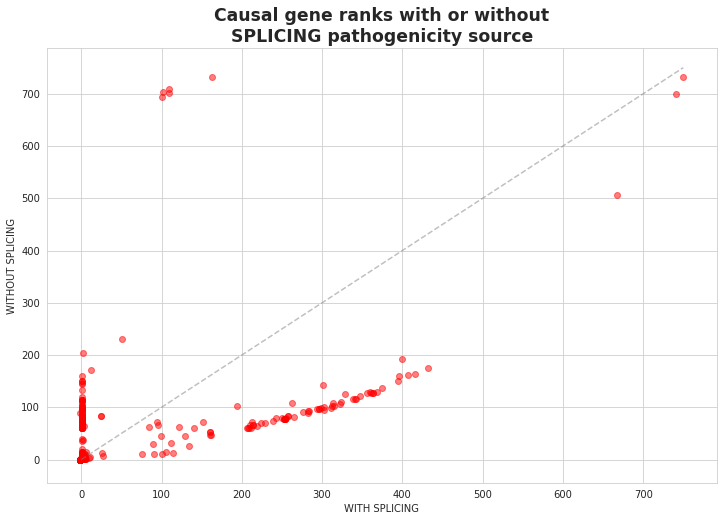

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

max_val = max([df.WITH_SPLICING.max(), df.WITHOUT_SPLICING.max()])
line_points = np.linspace(0, max_val, 10)
line = ax.plot(line_points, line_points, "--", color="grey", alpha=0.5)
sct = ax.scatter(df.WITH_SPLICING, df.WITHOUT_SPLICING, color='red', alpha=0.5)

xl = ax.set_xlabel("WITH SPLICING")
yl = ax.set_ylabel("WITHOUT SPLICING")
title = ax.set_title("Causal gene ranks with or without\nSPLICING pathogenicity source",
                     size="xx-large", fontweight="bold")

## Which pathomechanisms are being discovered?

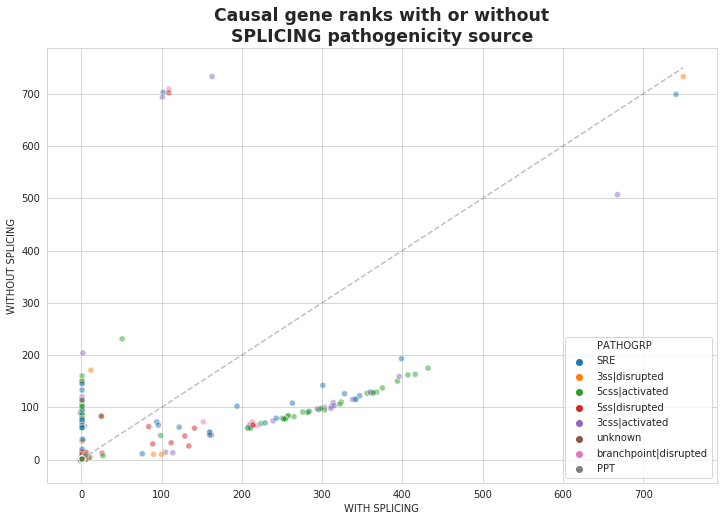

In [6]:
from curation import group_pathomechanism_for_threes_evaluation

fig, ax = plt.subplots(figsize=(12, 8))

df['PATHOGRP'] = df.PATHOMECHANISM.map(group_pathomechanism_for_threes_evaluation)

max_val = max([df.WITH_SPLICING.max(), df.WITHOUT_SPLICING.max()])
line_points = np.linspace(0, max_val, 10)
line = ax.plot(line_points, line_points, "--", color="grey", alpha=0.5)
sct = sns.scatterplot(df.WITH_SPLICING, df.WITHOUT_SPLICING, hue=df['PATHOGRP'], alpha=0.5, ax=ax)

xl = ax.set_xlabel("WITH SPLICING")
yl = ax.set_ylabel("WITHOUT SPLICING")
title = ax.set_title("Causal gene ranks with or without\nSPLICING pathogenicity source",
                     size="xx-large", fontweight="bold")

## Cases where Exomiser performed better _without_ SPLICING score

In [8]:
where_to_save = "/home/ielis/data/threes-simulations/20190711-output-checked/20190711-to_improve.tsv"
df.loc[(df.WITH_SPLICING > 50) & (df.WITH_SPLICING < 200), :].to_csv(where_to_save, sep="\t")